## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### Datasets: https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes

In [581]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 

#### Análisis Exploratorio de los datos

#### 1) Importo Datasets

In [582]:
ds2019 = pd.read_csv('dataset/historico-2019.csv', parse_dates=True)

In [583]:
ds2018 = pd.read_csv('dataset/molinetes-subte-18.csv', parse_dates=True)

In [584]:
ds2017 = pd.read_csv('dataset/molinetes_2017.csv',  encoding='latin-1', parse_dates=True)

#### Preview

In [585]:
ds2017.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
0,1,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
1,2,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_N_TURN02,6,9 DE JULIO,1,0,0,1
2,3,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,1,0,0,1
3,4,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
4,5,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,2,0,0,2


In [586]:
ds2017.dtypes

V1                  int64
FECHA              object
DESDE              object
HASTA              object
LINEA              object
MOLINETE           object
ID_ESTACION         int64
ESTACION           object
PAX_PAGOS           int64
PAX_PASES_PAGOS     int64
PAX_FREQ            int64
TOTAL               int64
dtype: object

In [587]:
ds2018.head()

,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
0,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_CBarros_S_Turn01,Castro Barros,1.0,0.0,0.0,1.0,201801
1,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_S_Turn03,Lima,4.0,0.0,0.0,4.0,201801
2,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,0.0,0.0,1.0,201801
3,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Peru_S_Turn01,Peru,4.0,0.0,0.0,4.0,201801
4,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_PJunta_S_Turn02,Primera Junta,2.0,0.0,0.0,2.0,201801


In [588]:
ds2018.dtypes

fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
periodo              int64
dtype: object

In [589]:
ds2019.head()

,periodo,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total
0,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_N_Turn02,Lima,1.0,0.0,0.0,1.0
1,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Loria_N_Turn03,Loria,3.0,0.0,0.0,3.0
2,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_Q_HALL_Turn01,Plaza Miserere,3.0,0.0,0.0,3.0
3,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn01,Plaza Miserere,6.0,0.0,0.0,6.0
4,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn03,Plaza Miserere,10.0,0.0,0.0,10.0


In [590]:
ds2019.dtypes

periodo              int64
fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
dtype: object

#### Convierto fechas a datetime

In [591]:
ds2017['FECHA'] = ds2017['FECHA'].astype('datetime64')
ds2018['fecha'] = ds2018['fecha'].astype('datetime64')
ds2019['fecha'] = ds2019['fecha'].astype('datetime64')

#### Agrupo pasajeros por día

In [592]:
grouped_2017 = ds2017.groupby('FECHA').sum()
grouped_2017.head()

,V1,ID_ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
FECHA,,,,,,
2017-01-01,116346875897,885011,83066,24,3712,86802
2017-01-02,198773020743,1504729,814825,527,27545,842897
2017-01-03,201804728922,1509303,993900,618,29107,1023625
2017-01-04,186327717365,1419927,493747,569,18558,512874
2017-01-05,143368810355,1057281,197276,307,7127,204710


In [593]:
grouped_2018 = ds2018.groupby('fecha').sum()
grouped_2018.head()

,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
fecha,,,,,
2018-01-01,104473.0,66.0,3944.0,108483.0,4163356431
2018-01-02,871239.0,1165.0,26505.0,898909.0,7100973588
2018-01-03,939971.0,1191.0,28952.0,970114.0,7183913799
2018-01-04,900927.0,1101.0,27482.0,929510.0,7021867596
2018-01-05,923053.0,1079.0,26494.0,950626.0,7236583860


In [594]:
grouped_2019 = ds2019.groupby('fecha').sum()
grouped_2019.head()

,periodo,pax_pagos,pax_pases_pagos,pax_franq,total
fecha,,,,,
2019-01-01,4239921000,98685.0,81.0,3407.0,102173.0
2019-01-02,7423294067,811786.0,1087.0,23929.0,836802.0
2019-01-03,7586631976,964559.0,1240.0,30610.0,996409.0
2019-01-04,7594102313,964616.0,1184.0,30249.0,996049.0
2019-01-05,6477185981,383196.0,223.0,13228.0,396647.0


#### Me quedo con cantidad total de pasajeros en cada dataset

In [595]:
ts_2017 = grouped_2017[['TOTAL']]
ts_2017 = ts_2017.rename(columns = {'TOTAL':'total'})
ts_2018 = grouped_2018[['total']]
ts_2019 = grouped_2019[['total']]

#### Consolido datasets

In [596]:
molinetes = pd.concat([ts_2017, ts_2018, ts_2019])

In [597]:
molinetes.head()

,total
2017-01-01,86802.0
2017-01-02,842897.0
2017-01-03,1023625.0
2017-01-04,512874.0
2017-01-05,204710.0


In [598]:
molinetes.shape

(1092, 1)

#### Grafico

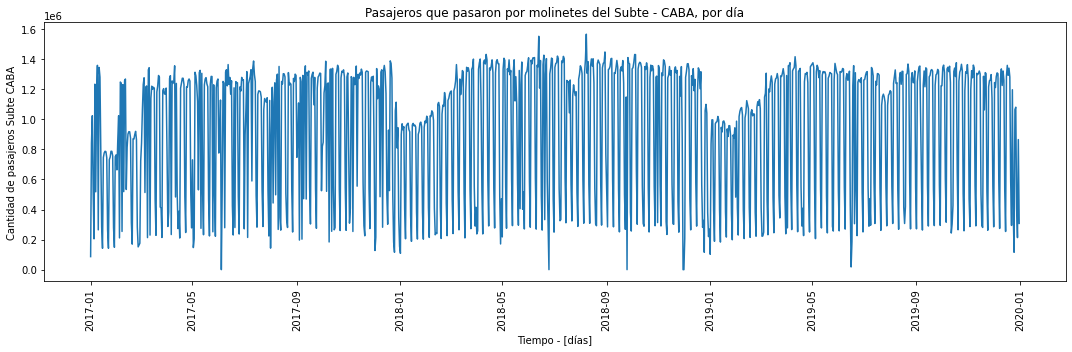

In [599]:
plt.figure(figsize=(15,5))
plt.plot(molinetes)
plt.title('Pasajeros que pasaron por molinetes del Subte - CABA, por día')
plt.ylabel('Cantidad de pasajeros Subte CABA')
plt.xlabel('Tiempo - [días]')
plt.xticks(rotation=90)
plt.tight_layout()


#### Descripción: En la serie temporal se muestra un patrón que se repite anualmente, y oscila entre aproximadamente 200.000 y 1,3 millones de ingresos diarios registrados en estaciones del subte. En Enero se observa la menor cantidad máxima de pasajeros, que corresponde a vacaciones de verano. A partir de allí los máximos comienzan a crecer hasta que alrededor del mes de Abril, donde esos máximos se estabilizan y se mantienen aproximadamente constantes hasta Diciembre que es donde comienzan a decrecer nuevamente. Se observa una caída breve en los máximos que ocurre alrededor del mes de Julio, que posiblemente corresponda al período de receso escolar de invierno. A simple vista no se distingue una tendencia significativa en la serie.

#### Histograma

Text(0.5, 1.0, 'Histograma - 20 bins')

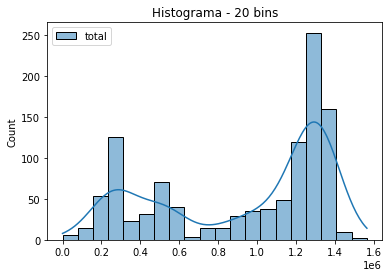

In [600]:
sns.histplot(molinetes, bins=20, kde=True)
plt.title('Histograma - 20 bins')

#### No se aprecia una distribución de datos conocida

#### Descomposición con Modelo Aditivo

In [601]:
from statsmodels.tsa.stattools import adfuller, acf, kpss, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [602]:
decomposed = sm.tsa.seasonal_decompose(molinetes, period=365, model='additive')

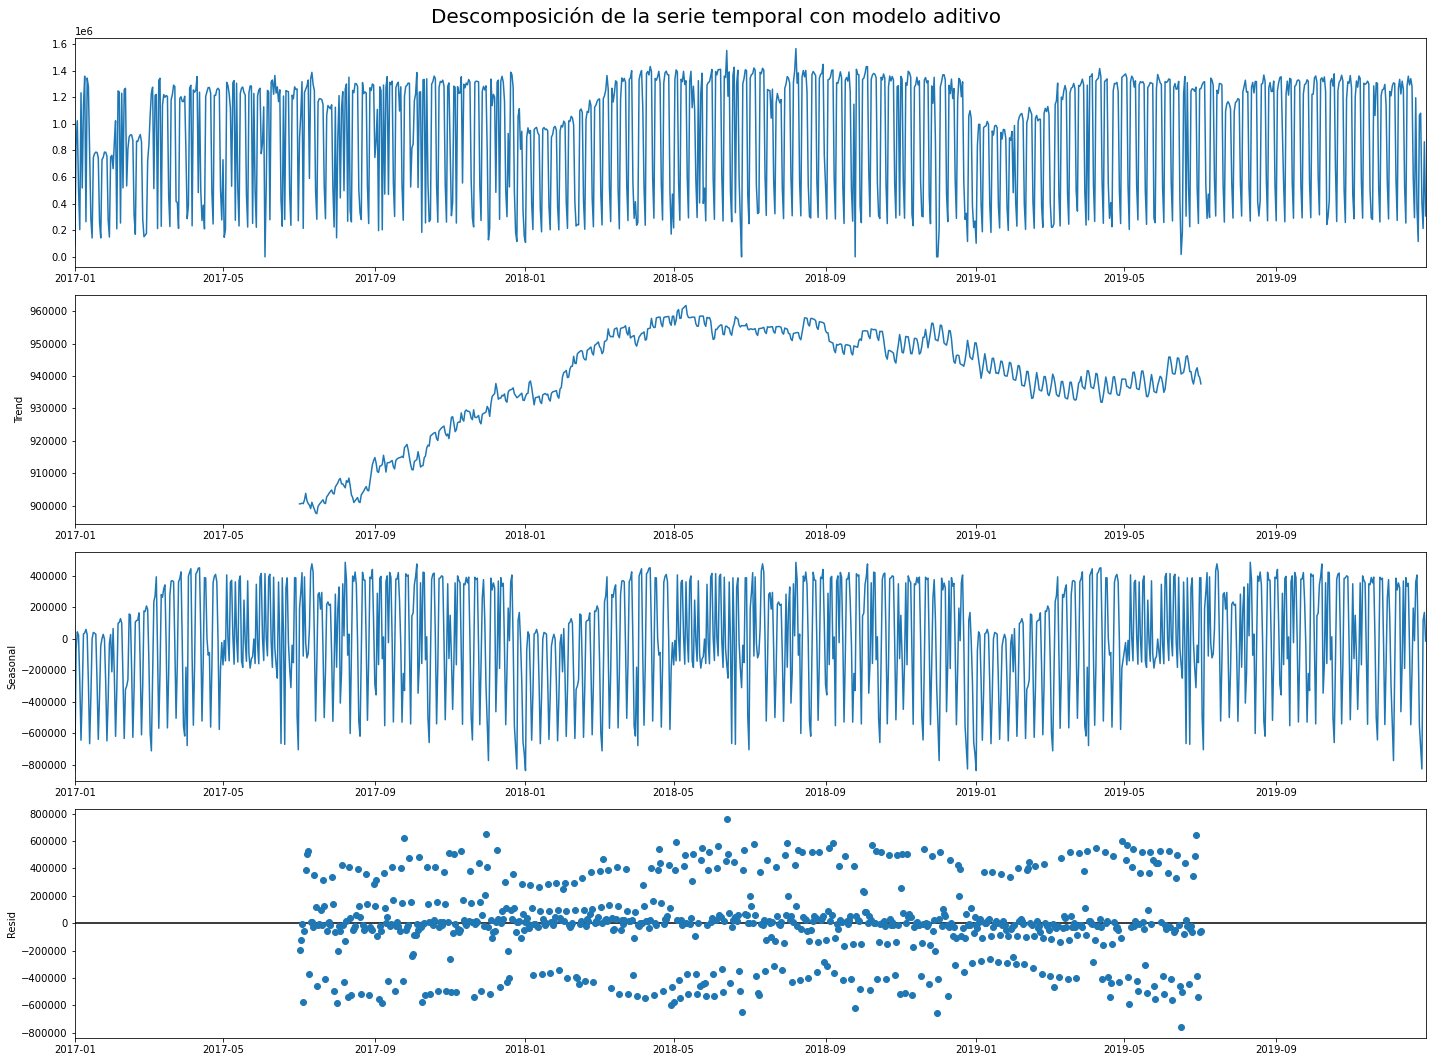

In [603]:

decomp_plot = decomposed.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)
decomp_plot.set_size_inches(20,15)
plt.suptitle("Descomposición de la serie temporal con modelo aditivo").set_fontsize(20)
plt.tight_layout()
plt.show()

### Estacionariedad

#### A simple vista, la serie no es estacionaria, se observa que la media y la varianza cambian con el tiempo. A continuación voy a hacer una evaluación formal con los métodos vistos en clase.

#### Método de la autocorrelación muestral

In [604]:
acf(molinetes)

array([ 1.        ,  0.29155155, -0.17347456, -0.22164242, -0.29603802,
       -0.14258866,  0.25175606,  0.55304417,  0.23167457, -0.14104013,
       -0.26883716, -0.24764908, -0.12002898,  0.22877675,  0.52791267,
        0.18935598, -0.15241648, -0.25153701, -0.24477845, -0.1097797 ,
        0.24113639,  0.52231846,  0.20850463, -0.17515805, -0.27337951,
       -0.22147356, -0.12868694,  0.26950073,  0.57876035,  0.19086754,
       -0.14305941])

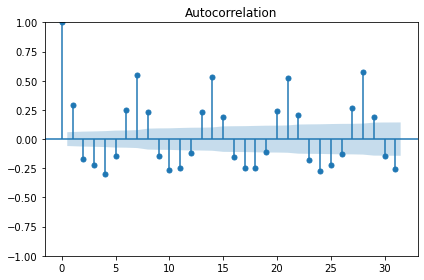

In [605]:
sm.graphics.tsa.plot_acf(molinetes)
plt.tight_layout()
plt.show()

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


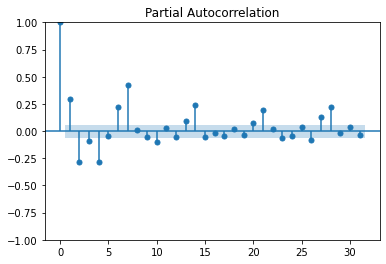

In [606]:
sm.graphics.tsa.plot_pacf(molinetes)
plt.show()

#### Se observa que para lags grandes la autocorrelación no alcanza valores nulos, y esto indicaría que no es estacionaria.

#### Método de Dickey-Fuller Aumentado

In [607]:
adfuller(molinetes)

(-4.712644269778308,
 7.966876063772809e-05,
 22,
 1069,
 {'1%': -3.4364819663568262,
  '5%': -2.864247479652846,
  '10%': -2.568211560046239},
 30149.87315265922)

#### El pvalor en este caso da muy pequeño (0,000079) <0,05 es decir rechazo H0 y significaría que la serie es estacionaria (que no hay caminante aleatorio) de acuerdo a este test. Sin embargo, el test considera la serie diferenciada, así que voy a usar otros tests para complementar el análisis.
 

#### Test KPSS

In [631]:
kpss(molinetes, regression='ct')
#kpss(molinetes, regression='ct', nlags=1091)

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.06720761855372281,
 0.1,
 103,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

#### En el caso de este test, busco un pvalor grande (p_valor > 0.05 busco no rechazar H0) - el resultado muestra un pvalor = 0.1 con lo cual este test también estaría indicando que la serie es estacionaria.

### Pre-procesamiento

#### 1) Box-Cox

In [609]:
box_cox = molinetes.copy()

In [610]:
box_cox['total0'] = boxcox(box_cox['total'], lmbda=0.0) # Transformación logarítmica
box_cox['total0.05'] = boxcox(box_cox['total'], lmbda=0.05)
box_cox['total0.1'] = boxcox(box_cox['total'], lmbda=0.1) 
box_cox['total0.5'] = boxcox(box_cox['total'], lmbda=0.5) 

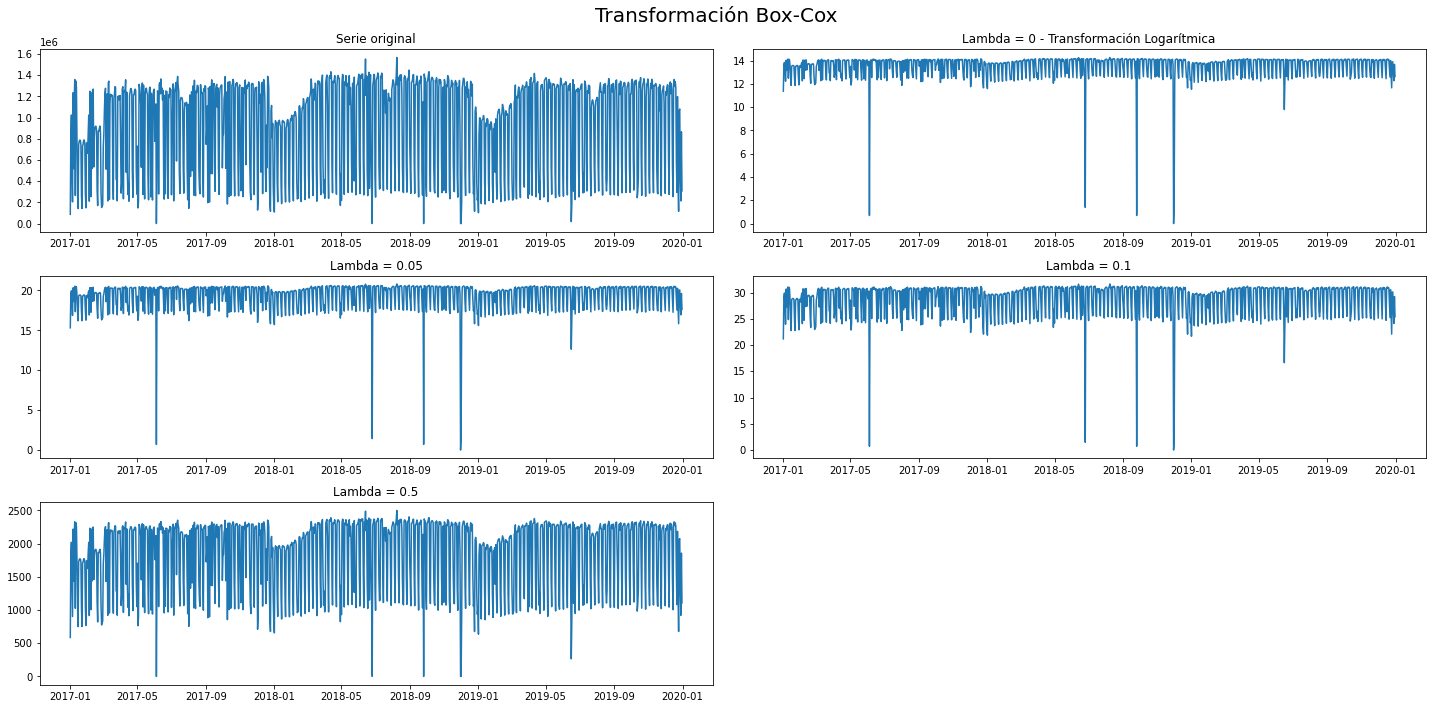

In [611]:
plt.figure(figsize=[20,10])

plt.subplot(3,2,1)
plt.plot(box_cox.total)
plt.title('Serie original')

plt.subplot(3,2,2)
plt.plot(box_cox.total0)
plt.title('Lambda = 0 - Transformación Logarítmica')

plt.subplot(3,2,3)
plt.plot(box_cox['total0.05'])
plt.title('Lambda = 0.05')


plt.subplot(3,2,4)
plt.plot(box_cox['total0.1'])
plt.title('Lambda = 0.1')

plt.subplot(3,2,5)
plt.plot(box_cox['total0.5'])
plt.title('Lambda = 0.5')

plt.suptitle('Transformación Box-Cox').set_fontsize(20)
plt.tight_layout()


#### 2) Media y Mediana Móvil

In [612]:
rolling_mean = molinetes.copy()
rolling_median = molinetes.copy()

In [613]:
rolling_mean['result_7']=rolling_mean['total'].rolling(7).mean()
rolling_mean['result_14']=rolling_mean['total'].rolling(14).mean()
rolling_mean['result_30']=rolling_mean['total'].rolling(30).mean()

In [614]:
rolling_median['result_7']=rolling_median['total'].rolling(7).median()
rolling_median['result_14']=rolling_median['total'].rolling(14).median()
rolling_median['result_30']=rolling_median['total'].rolling(30).median()

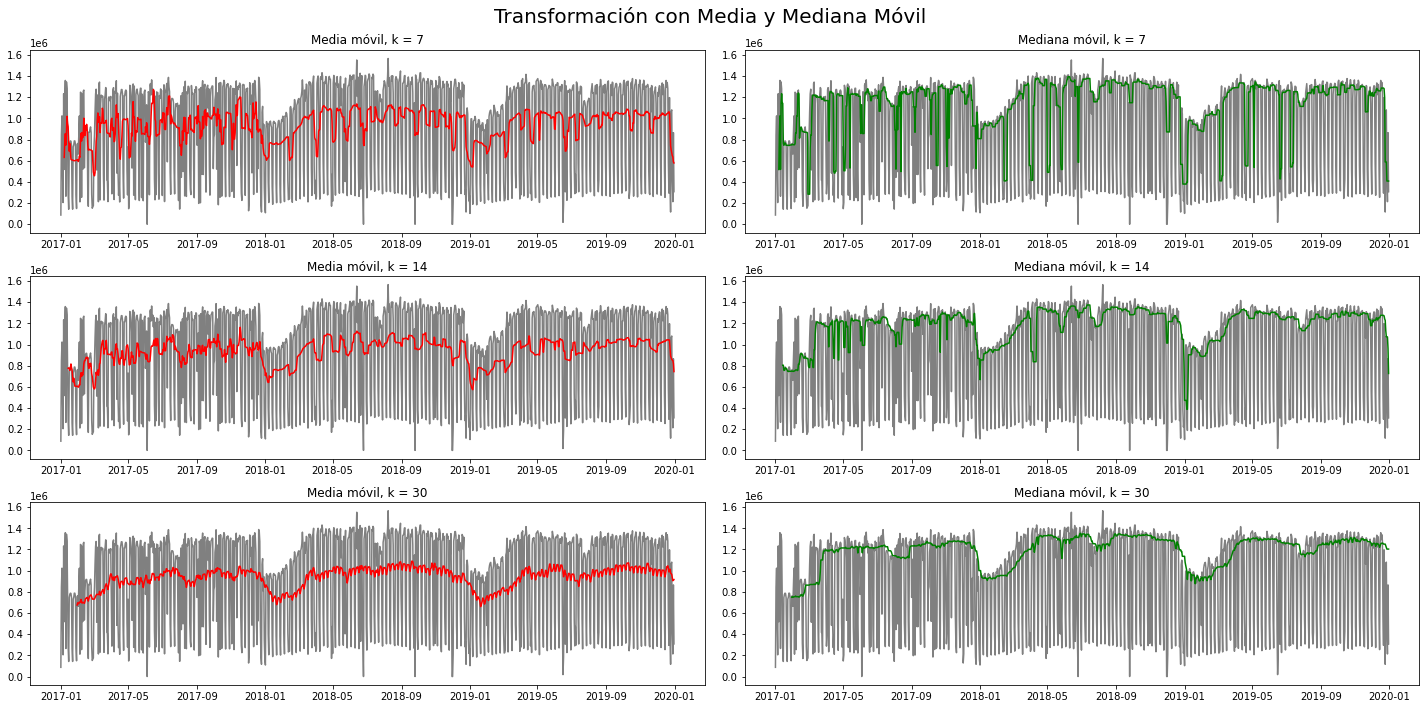

In [615]:
plt.figure(figsize=[20,10])

plt.subplot(3,2,1)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_7'], color='red')
plt.title('Media móvil, k = 7')

plt.subplot(3,2,2)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_7'], color='green')
plt.title('Mediana móvil, k = 7')

plt.subplot(3,2,3)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_14'], color='red')
plt.title('Media móvil, k = 14')

plt.subplot(3,2,4)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_14'], color='green')
plt.title('Mediana móvil, k = 14')

plt.subplot(3,2,5)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_30'], color='red')
plt.title('Media móvil, k = 30')

plt.subplot(3,2,6)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_30'], color='green')
plt.title('Mediana móvil, k = 30')

plt.suptitle('Transformación con Media y Mediana Móvil').set_fontsize(20)
plt.tight_layout()


#### Diferenciación

In [625]:
difference = molinetes.copy()

In [626]:
difference['diff_1'] = difference['total'].diff()
difference['diff_2'] = difference['total'].diff(periods=365)

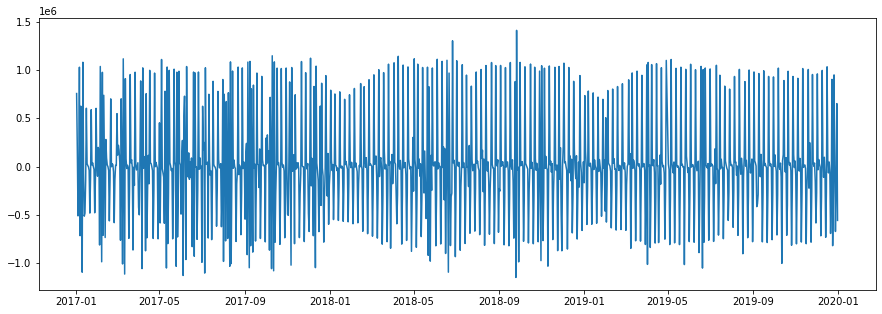

In [627]:
plt.figure(figsize=(15,5))
plt.plot(difference.diff_1)


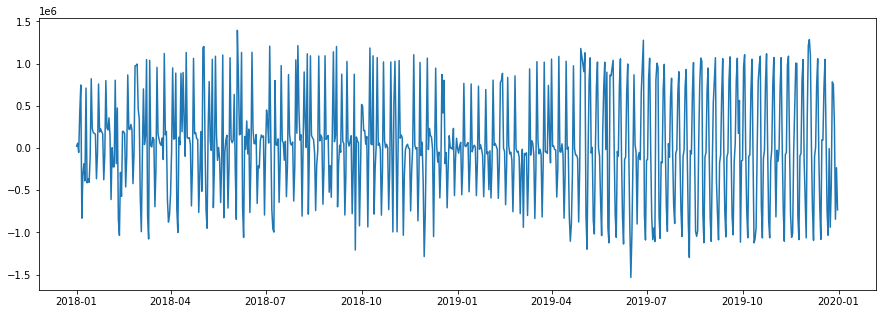

In [624]:
plt.figure(figsize=(15,5))
plt.plot(difference.diff_2)